# Import Library

In [1]:
import pandas as pd
import os
import numpy as np
from zipfile import ZipFile
import csv
import string
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from os.path import exists
import shutil
from PIL import Image
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Extract Data

In [3]:
!cp "/content/drive/MyDrive/Capstone Bangkit/Machine Learning/Yoga.zip" /content

In [4]:
with ZipFile("Yoga.zip", 'r') as a:
  a.extractall()

In [ ]:
# shutil.rmtree('backPain')

In [5]:
PATH1 = "content/Yoga/"
FILE1 = os.listdir(PATH1)
a = 0
for i in FILE1:
  FILE2 = PATH1 + i + '/'
  for file_name in os.listdir(FILE2):
    file_path = FILE2 + file_name
    if file_name.endswith('.jpg'):
      try:
        img = Image.open(file_path) # open the image file
        img.verify() # verify that it is, in fact an image
      except (IOError, SyntaxError) as e:
        os.remove(file_path)
        a+=1
print(a,"Images are removed")

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


8202 Images are removed


In [ ]:
# PATH1 = "content/Yoga/"
# FILE1 = os.listdir(PATH1)
# a = 0
# for i in FILE1:
#   FILE2 = PATH1 + i + '/'
#   for file_name in os.listdir(FILE2):
#     file_path = FILE2 + file_name
#     img = cv2.imread(file_path)
#     # resize image by specifying custom width and height
#     try:
#       resized = cv2.resize(img, (300, 300))
#       cv2.imwrite(file_path, resized)
#       a+=1
#     except:
#       continue
# print(a,"Image are reshaped")

19547 Image are reshaped


In [ ]:
import random
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  all_files = []
    
  for file_name in os.listdir(SOURCE_DIR):
      file_path = SOURCE_DIR + file_name

      if os.path.getsize(file_path):
          all_files.append(file_name)
  
  n_files = len(all_files)
  split_point = int(n_files * SPLIT_SIZE)
  
  shuffled = random.sample(all_files, n_files)
  
  train_set = shuffled[:split_point]
  test_set = shuffled[split_point:]
  
  for file_name in train_set:
      shutil.copy2(SOURCE_DIR + file_name, TRAINING_DIR + file_name)
      
  for file_name in test_set:
      shutil.copy2(SOURCE_DIR + file_name, VALIDATION_DIR + file_name)

In [ ]:
def rgb_to_gray(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     preprocessing_function=rgb_to_gray,
                                     rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                    #  shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                    #  fill_mode='nearest'
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255,
                                          # preprocessing_function=rgb_to_gray,
                                          # rotation_range=40,
                                          # width_shift_range=0.2,
                                          # height_shift_range=0.2,
                                          # shear_range=0.2,
                                          # zoom_range=0.2,
                                          # horizontal_flip=True,
                                          # fill_mode='nearest'
                                          )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  ### END CODE HERE
  return train_generator, validation_generator

In [6]:
!rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
PATH1 = "content/Yoga/"
FILE1 = os.listdir(PATH1)
for i in FILE1:
  a = 0
  FILE2 = PATH1 + i + '/'
  for file_name in os.listdir(FILE2):
    a+=1
  if a>=200:
    print(i,"has",a,"images")

Bound_Angle_Pose_or_Baddha_Konasana_ has 283 images
Seated_Forward_Bend_pose_or_Paschimottanasana_ has 360 images
Revolved_Head-to-Knee_Pose_or_Parivrtta_Janu_Sirsasana_ has 225 images
Virasana_or_Vajrasana has 352 images
Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana_ has 315 images
Plow_Pose_or_Halasana_ has 329 images
Fish_Pose_or_Matsyasana_ has 305 images
Supported_Headstand_pose_or_Salamba_Sirsasana_ has 312 images
Feathered_Peacock_Pose_or_Pincha_Mayurasana_ has 219 images
Corpse_Pose_or_Savasana_ has 336 images
Child_Pose_or_Balasana_ has 318 images
Standing_Forward_Bend_pose_or_Uttanasana_ has 407 images
Crane_(Crow)_Pose_or_Bakasana_ has 314 images
Bow_Pose_or_Dhanurasana_ has 239 images
Scorpion_pose_or_vrischikasana has 237 images
Four-Limbed_Staff_Pose_or_Chaturanga_Dandasana_ has 229 images
Supta_Virasana_Vajrasana has 324 images
Rajakapotasana has 274 images
Cobra_Pose_or_Bhujangasana_ has 830 images
Warrior_II_Pose_or_Virabhadrasana_II_ has 268 images
Boat_Pose_or_Par

Backpain: https://www.healthline.com/health/fitness-exercise/yoga-for-back-pain
- Downward-Facing Dog: 315
- Cobra Pose: 830
- Bridge Pose: 281
- Child Pose: 318
- Locust_Pose: 241

  Total: 2398

Anxiety: https://www.healthline.com/health/anxiety/yoga-for-anxiety 
- Tree Pose: 266
- Triangle Pose: 542
- Standing Forward Bend: 407
- Fish Pose: 305
- Child Pose: 381

  Total: 2126

Flexibility: https://www.healthline.com/health/exercise-fitness/yoga-for-flexibility 
- Plow Pose: 329
- Catcow: 413
- Bow Pose: 239
- Low lunge: 261
- Cow Face Pose: 315

  Total: 1782

Neck Pain: https://www.healthline.com/health/yoga-for-neck-pain
- Standing_Forward_Bend: 407
- Warrior_II: 268
- Triangle Pose: 542
- Cow Face Pose: 315
- Corpse_Pose: 336

  Total: 2281


#All

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     preprocessing_function=rgb_to_gray,
                                     rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                    #  shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                    #  fill_mode='nearest'
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=80,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255,
                                          # preprocessing_function=rgb_to_gray,
                                          # rotation_range=40,
                                          # width_shift_range=0.2,
                                          # height_shift_range=0.2,
                                          # shear_range=0.2,
                                          # zoom_range=0.2,
                                          # horizontal_flip=True,
                                          # fill_mode='nearest'
                                          )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=80,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [7]:
all = ['Bow_Pose_or_Dhanurasana_',
       'Bridge_Pose_or_Setu_Bandha_Sarvangasana_',
       'Child_Pose_or_Balasana_',
       'Cobra_Pose_or_Bhujangasana_', 'Corpse_Pose_or_Savasana_',
       'Cow_Face_Pose_or_Gomukhasana_',
       'Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana_',
       'Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana_',
       'Fish_Pose_or_Matsyasana_', 'Locust_Pose_or_Salabhasana_',
       'Low_Lunge_pose_or_Anjaneyasana_', 'Plow_Pose_or_Halasana_',
       'Standing_Forward_Bend_pose_or_Uttanasana_',
       'Tree_Pose_or_Vrksasana_', 'Warrior_II_Pose_or_Virabhadrasana_II_']

In [8]:
!mkdir all

In [9]:
for i in range(len(all)):
  src = f"content/Yoga/{all[i]}"
  dst = f"all/data/{all[i]}"
  shutil.copytree(src, dst)

In [ ]:
!mkdir all/training

In [ ]:
!mkdir all/validation

In [ ]:
for i in range(15):
  !mkdir all/training/$i
  !mkdir all/validation/$i

In [ ]:
for i in range(15):
  source = f"/content/all/data/{all[i]}/"
  train = f"/content/all/training/{i}/"
  valid = f"/content/all/validation/{i}/"
  split = 0.9
  split_data(source, train, valid, split)

In [ ]:
TRAINING_DIR = "all/training"
VALIDATION_DIR = "all/validation"
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 4721 images belonging to 15 classes.
Found 532 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19
model3 = tf.keras.Sequential()
model3.add(VGG19(include_top = False,weights = 'imagenet',input_shape= (150,150,3)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(15,activation = 'softmax'))
model3.summary()

80134624/80134624 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 15)                122895    
                                                                 
Total params: 20,147,279
Trainable params: 20,147,279
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.0001)
model3.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),optimizer = optimizer,metrics = ['accuracy'])

In [ ]:
# Save your model

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy')>0.90):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
# Train your model
history = model3.fit(train_generator,
                    epochs=30,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


60/60 [==============================] - 170s 2s/step - loss: 2.4766 - accuracy: 0.2141 - val_loss: 2.3535 - val_accuracy: 0.3195
Epoch 2/30
60/60 [==============================] - 138s 2s/step - loss: 2.2538 - accuracy: 0.2851 - val_loss: 1.5562 - val_accuracy: 0.4944
Epoch 3/30
60/60 [==============================] - 143s 2s/step - loss: 1.6553 - accuracy: 0.4694 - val_loss: 1.1013 - val_accuracy: 0.6429
Epoch 4/30
60/60 [==============================] - 139s 2s/step - loss: 1.2073 - accuracy: 0.6177 - val_loss: 0.8051 - val_accuracy: 0.7444
Epoch 5/30
60/60 [==============================] - 140s 2s/step - loss: 1.0798 - accuracy: 0.6662 - val_loss: 0.5537 - val_accuracy: 0.8383
Epoch 6/30
60/60 [==============================] - 141s 2s/step - loss: 0.7992 - accuracy: 0.7416 - val_loss: 0.4719 - val_accuracy: 0.8553
Epoch 7/30
60/60 [==============================] - 137s 2s/step - loss: 0.6523 - accuracy: 0.7971 - val_loss: 0.3799 - val_accuracy: 0.8741
Epoch 8/30
60/60 [======

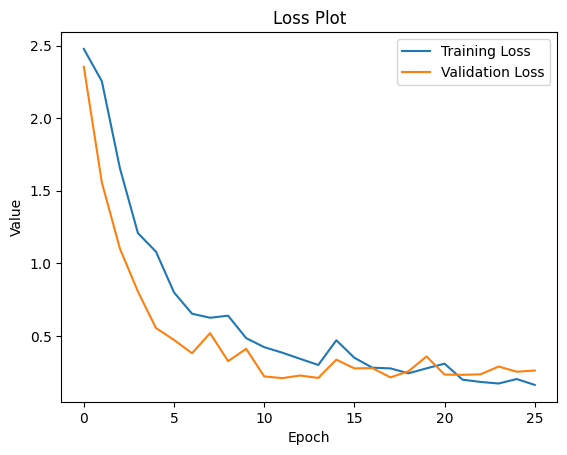

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

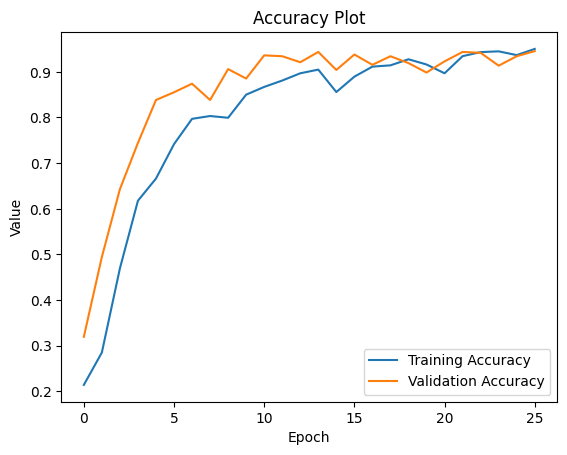

In [ ]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving bow.jpeg to bow.jpeg
1/1 [==============================] - 0s 173ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


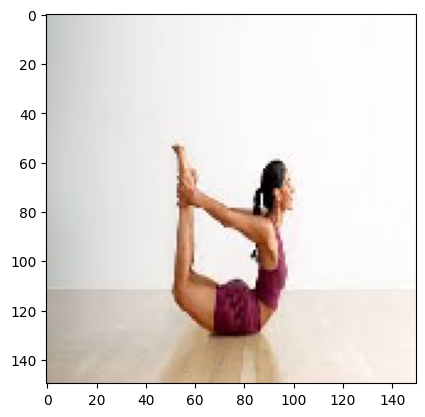

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = tf.keras.utils.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model3.predict(images, batch_size=10)

  print(classes)

In [ ]:
model3.save('my_model')

In [ ]:
!zip -r all.zip my_model

  adding: my_model/ (stored 0%)
  adding: my_model/variables/ (stored 0%)
  adding: my_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: my_model/variables/variables.index (deflated 72%)
  adding: my_model/assets/ (stored 0%)
  adding: my_model/fingerprint.pb (stored 0%)
  adding: my_model/saved_model.pb (deflated 90%)
  adding: my_model/keras_metadata.pb (deflated 96%)


In [ ]:
!cp all.zip "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam"

In [ ]:
model3.save('all.h5')

In [ ]:
!cp all.h5 "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam"

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("my_model") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('all.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!cp all.tflite "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam"